<a href="https://colab.research.google.com/github/RishiSiliguri/Rishav/blob/master/Etherium_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the Etherium data
from google.colab import files
files.upload()


Saving ETH-USD.csv to ETH-USD.csv


{'ETH-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984\n2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984\n2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992\n2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936\n2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984\n2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000\n2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984\n2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016\n2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992\n2017-11-18,331.980011,349.615997,327.687012,347.612000,347.612000,649638976\n2017-11-19,347.401001,371.290985,344.739990,354.385986,354.385986,1181529984\n2017-11-20,354.093994,372.136993,353.289001,366.730011,366.730011,807027008\n2017-11-21,

In [ ]:
#Reading the Data
df= pd.read_csv('ETH-USD.csv')
#Set the date as the index
df= df.set_index(pd.DatetimeIndex(df['Date'].values))

#Showing the Data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2017-11-09,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2022-01-15,2022-01-15,3309.844238,3364.537842,3278.670898,3330.530762,3330.530762,9619999078
2022-01-16,2022-01-16,3330.387207,3376.401123,3291.563721,3350.921875,3350.921875,9505934874
2022-01-17,2022-01-17,3350.947266,3355.819336,3157.224121,3212.304932,3212.304932,12344309617
2022-01-18,2022-01-18,3212.287598,3236.016113,3096.123535,3164.025146,3164.025146,13024154091


In [ ]:
future_days= 5


In [ ]:
#Create a new column
df[str(future_days)+'_Day_Price_Forecast']= df[['Close']].shift(-future_days)
#Show the data
df[['Close', str(future_days)+'_Day_Price_Forecast' ]]

,Close,5_Day_Price_Forecast
2017-11-09,320.884003,337.631012
2017-11-10,299.252991,333.356995
2017-11-11,314.681000,330.924011
2017-11-12,307.907990,332.394012
2017-11-13,316.716003,347.612000
...,...,...
2022-01-15,3330.530762,NaN
2022-01-16,3350.921875,NaN
2022-01-17,3212.304932,NaN
2022-01-18,3164.025146,NaN


In [ ]:
X= np.array(df[['Close']])
X= X[:df.shape[0]- future_days]
print(X)

[[ 320.884003]
 [ 299.252991]
 [ 314.681   ]
 ...
 [3372.258301]
 [3248.288574]
 [3310.001465]]


In [ ]:
y= np.array(df[str(future_days)+'_Day_Price_Forecast'])
y=y[:-future_days]
print(y)


[ 337.631012  333.356995  330.924011 ... 3212.304932 3164.025146
 3064.70459 ]


In [ ]:
#Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.svm import SVR
svr_rbf= SVR(kernel='rbf', C=1e3, gamma= 0.0001)
svr_rbf.fit(x_train, y_train)


SVR(C=1000.0, gamma=0.0001)

In [ ]:
svr_rbf_confidence= svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9744019843112324


In [ ]:
svm_prediction= svr_rbf.predict(x_test)
print(svm_prediction)

[ 284.53854354  239.78300515 1845.26430638  435.8887434  2246.45389596
 3377.95015035  209.85700486  239.95169098  173.91366899  473.5730155
  314.7757278   209.45905699  268.10089108  412.17276718 2474.31437464
  241.05918748 3524.9342284  3844.13171725  221.78353335  142.65321093
 4067.41968791 3526.57469654  190.7314817   580.34006952  781.68172313
  188.0565454   473.90907361 1524.93364755 4471.28285549 3521.19858674
  181.82379935 3875.92716377  222.58335253 2442.96673928 1042.45012685
  227.74132522 2978.15715392 2302.07950555  173.34308179  844.92294524
  706.89670524 1280.15490363  479.12517646  577.51073352 2569.17497251
  140.28539864  697.51675397 3233.0974279  3842.90536378  242.18621566
  187.29534811  197.25522217  385.34033567  280.35400541  559.084043
 3230.30080614  241.65470932  599.75108421  108.01321756  196.01270899
  297.86807411  346.977841    146.94549994 2198.93660949 1822.90318305
  168.34406693  261.04762605 2295.48692416  200.81918272 2608.28820088
  107.976

In [ ]:
print(y_test)

[ 196.923996  244.426392 1782.855103  511.147003 2135.942139 3794.056641
  205.141998  222.959793  183.67395   447.114014  332.394012  205.429993
  270.225525  472.902008 2537.891113  244.698914 3100.325439 4079.057373
  210.488907  134.206955 4586.990234 2764.431152  218.050049  730.397339
  944.210022  185.119232  418.261993 1039.099976 4220.706055 3224.374268
  176.351517 3847.104492  264.728577 2827.328857 1224.197144  243.015961
 4651.460449 2088.57373   217.148575  752.830994  611.304016 1014.25
  465.852997  607.124023 2662.865234  136.758682  707.049988 3433.732666
 4626.358887  309.643616  177.455551  234.59523   391.02417   274.315002
  517.493713 3020.089844  244.911453  533.283997   92.159637  207.602051
  277.104004  380.652008  158.412445 1817.296631 2025.202759  166.95076
  307.827789 2773.207031  217.182999 2706.125      84.440811  434.40799
  204.335999 1492.608765  853.684021  586.011169 1225.678101  165.826096
  125.96653  3545.354004 1716.494629 1977.276855  268.113

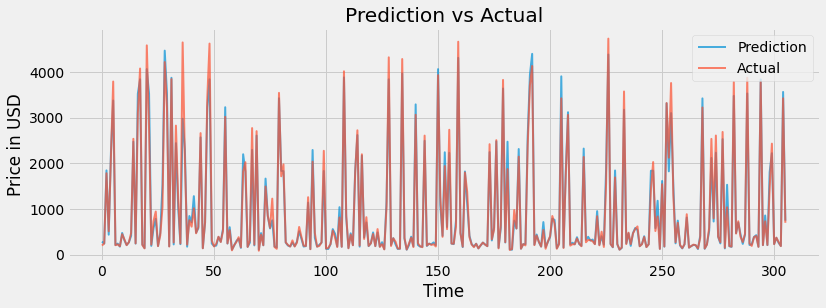

In [ ]:
plt.figure(figsize=(12,4)) 
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7) 
plt.plot(y_test, label='Actual', lw=2, alpha=.7)

plt.title('Prediction vs Actual')

plt.ylabel('Price in USD')

plt.xlabel('Time')

plt.legend()


plt.show()